In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

In [2]:
# Uploading data
booking = pd.read_csv("bookings.txt", sep=",")
booking.head()

,hotel,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,canceled
0,City Hotel,February,9,21,1,0,2,BB,ESP,Online TA,TA/TO,A,A,0,No Deposit,Transient,91.0,0,1,1
1,City Hotel,July,29,17,1,0,2,SC,SWE,Online TA,TA/TO,A,A,0,No Deposit,Transient,140.0,0,2,1
2,City Hotel,July,29,22,1,1,2,HB,DEU,Offline TA/TO,TA/TO,A,A,0,No Deposit,Transient-Party,122.4,0,1,0
3,City Hotel,March,11,9,0,3,2,BB,USA,Online TA,TA/TO,B,B,0,No Deposit,Transient,77.5,0,2,1
4,City Hotel,September,38,11,1,0,2,SC,GBR,Online TA,TA/TO,A,A,0,No Deposit,Transient,89.0,0,2,0


In [3]:
## Data Cleaning: checking

In [4]:
booking.dtypes

# Checking missing values
missing_counts = booking.isnull().sum()
cols_with_missing = missing_counts[missing_counts > 0]

if len(cols_with_missing) == 0:
    print("All columns have complete data: no missing n/A")
else:
    print("Columns with missing values:")
    print(cols_with_missing)

# Summary of each column
booking.describe(include='all')

All columns have complete data: no missing n/A


,hotel,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,canceled
count,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000,5000,5000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000
unique,2,12,NaN,NaN,NaN,NaN,NaN,5,90,7,4,8,10,NaN,3,4,NaN,NaN,NaN,NaN
top,City Hotel,August,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,A,A,NaN,No Deposit,Transient,NaN,NaN,NaN,NaN
freq,3258,585,NaN,NaN,NaN,NaN,NaN,3807,2048,2347,4065,3551,3068,NaN,4396,3725,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.061800,15.708600,0.906600,2.489800,1.863000,NaN,NaN,NaN,NaN,NaN,NaN,0.219000,NaN,NaN,102.669692,0.065000,0.574200,0.365200
std,NaN,NaN,13.531585,8.791311,0.971012,1.826955,0.482781,NaN,NaN,NaN,NaN,NaN,NaN,0.673446,NaN,NaN,48.879693,0.248168,0.793864,0.481534
min,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,70.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,94.500000,0.000000,0.000000,0.000000
75%,NaN,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,126.000000,0.000000,1.000000,1.000000


In [17]:
# Removing invalid entries
booking = booking[booking['adr'] > 0]
booking = booking[booking['adults'] > 0]

In [5]:
## Variables

In [6]:
# Creating variables
booking['total_nights'] = booking['stays_in_weekend_nights'] + booking['stays_in_week_nights']

# Modifying variables
booking['meal'] = booking['meal'].replace({'BB': 'Bed & Breakfast', 'FB': 'Full Board', 'HB': 'Half Board', 'SC': 'No Meal', 'Undefined': 'No Meal'})

In [7]:
# Formatting arrival date
# Choose 2024 = the most recent leap year
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
booking['month_num'] = booking['arrival_date_month'].map(month_map)

booking['arrival_date'] = pd.to_datetime({
    'year': 2024,
    'month': booking['month_num'],
    'day': booking['arrival_date_day_of_month']
}, errors='coerce')

# Formatting leaving date
booking['departure_date'] = booking['arrival_date'] + pd.to_timedelta(booking['total_nights'], unit='D')

In [8]:
## 1. Distribution of variables

In [9]:
# Proportion of cancelled bookings
cancellation_rate = booking['canceled'].mean()
print(f"Overall cancellation rate: {cancellation_rate:.2%}")

Overall cancellation rate: 36.52%


In [10]:
# Distribution of numerical variabes
num_vars = ['canceled', 'adults', 'total_nights', 'required_car_parking_spaces', 'total_of_special_requests', 'booking_changes', 'adr']

num_summary = pd.DataFrame({
    'Mean': booking[num_vars].mean(),
    'Median': booking[num_vars].median(),
    'Std dev': booking[num_vars].std(),
    'Min': booking[num_vars].min(),
    'Max': booking[num_vars].max()
}).round(2)

num_summary

# display(
#     num_summary.style
#     .set_caption("Distribution of numerical variables")
#     .format(precision=2)
# )

,Mean,Median,Std dev,Min,Max
canceled,0.37,0.0,0.48,0.0,1.0
adults,1.86,2.0,0.48,0.0,4.0
total_nights,3.40,3.0,2.44,0.0,28.0
required_car_parking_spaces,0.06,0.0,0.25,0.0,2.0
total_of_special_requests,0.57,0.0,0.79,0.0,5.0
booking_changes,0.22,0.0,0.67,0.0,18.0
adr,102.67,94.5,48.88,0.0,382.0


In [11]:
# Distribution of categorical variables
cat_vars = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type', 'country', 'deposit_type']
for var in cat_vars:
    print(f"\nDistribution of {var}:")
    print(booking[var].value_counts(normalize=True).round(3)) 


Distribution of hotel:
hotel
City Hotel      0.652
Resort Hotel    0.348
Name: proportion, dtype: float64

Distribution of meal:
meal
Bed & Breakfast    0.761
Half Board         0.131
No Meal            0.100
Full Board         0.008
Name: proportion, dtype: float64

Distribution of market_segment:
market_segment
Online TA        0.469
Offline TA/TO    0.197
Groups           0.175
Direct           0.110
Corporate        0.041
Complementary    0.006
Aviation         0.002
Name: proportion, dtype: float64

Distribution of distribution_channel:
distribution_channel
TA/TO        0.813
Direct       0.133
Corporate    0.053
GDS          0.002
Name: proportion, dtype: float64

Distribution of customer_type:
customer_type
Transient          0.745
Transient-Party    0.217
Contract           0.034
Group              0.004
Name: proportion, dtype: float64

Distribution of country:
country
PRT    0.410
GBR    0.105
FRA    0.082
ESP    0.078
DEU    0.059
       ...  
CRI    0.000
QAT    0.000
BLR 

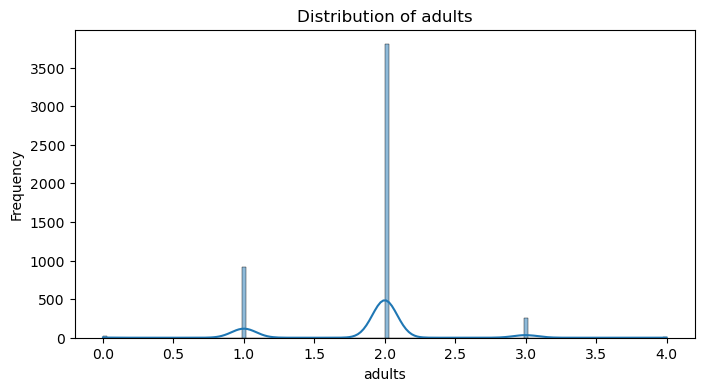

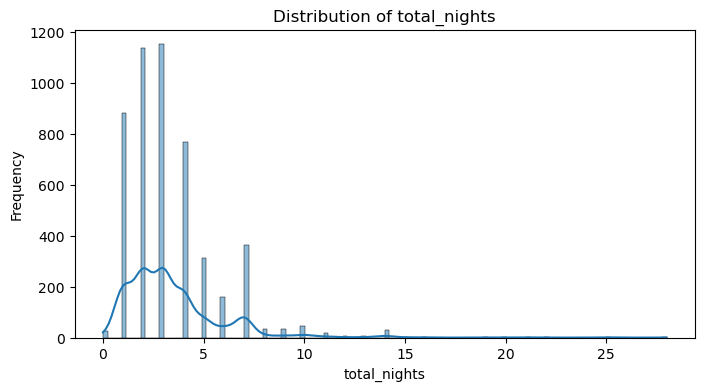

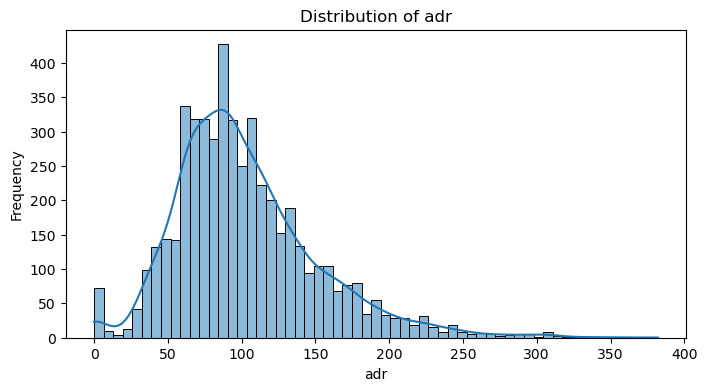

In [12]:
# Graphical representation of numerical variables
for var in ['adults', 'total_nights', 'adr']:
    plt.figure(figsize=(8, 4))
    sns.histplot(booking[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

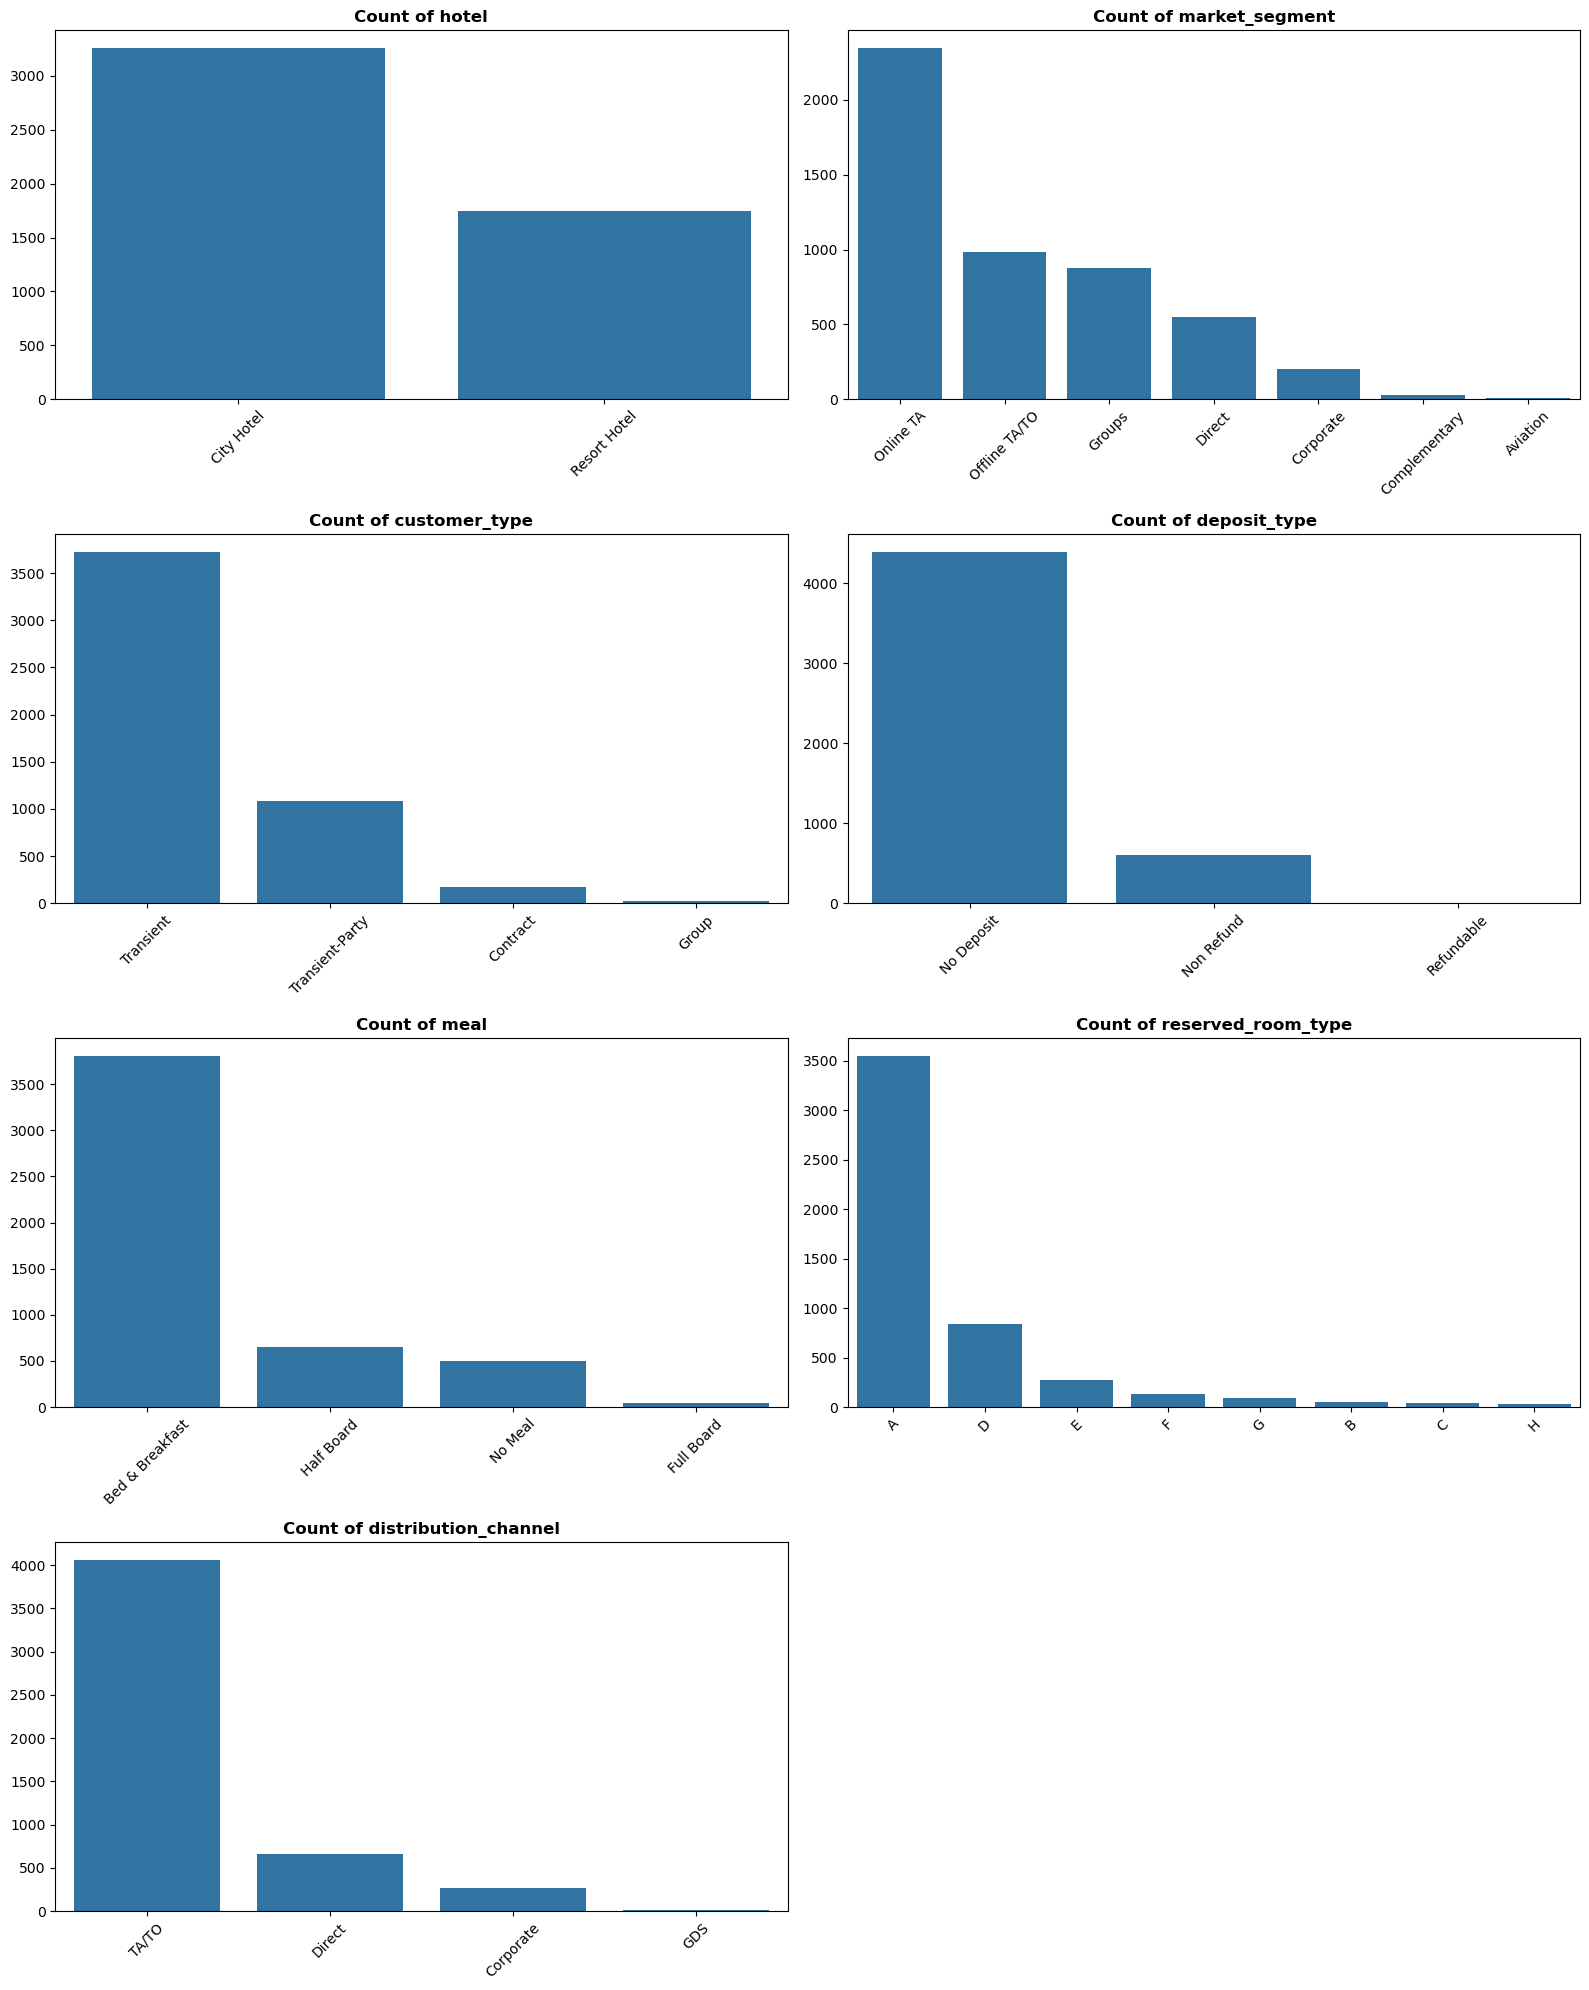

In [13]:
# Graphical representation of categorical variables
cat_vars = ['hotel', 'market_segment', 'customer_type', 'deposit_type', 'meal', 'reserved_room_type', 'distribution_channel']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(
        data=booking,
        x=var,
        order=booking[var].value_counts().index,
        ax=axes[i]
    )
    axes[i].set_title(f'Count of {var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
## 2. Cancellation rate related to variables

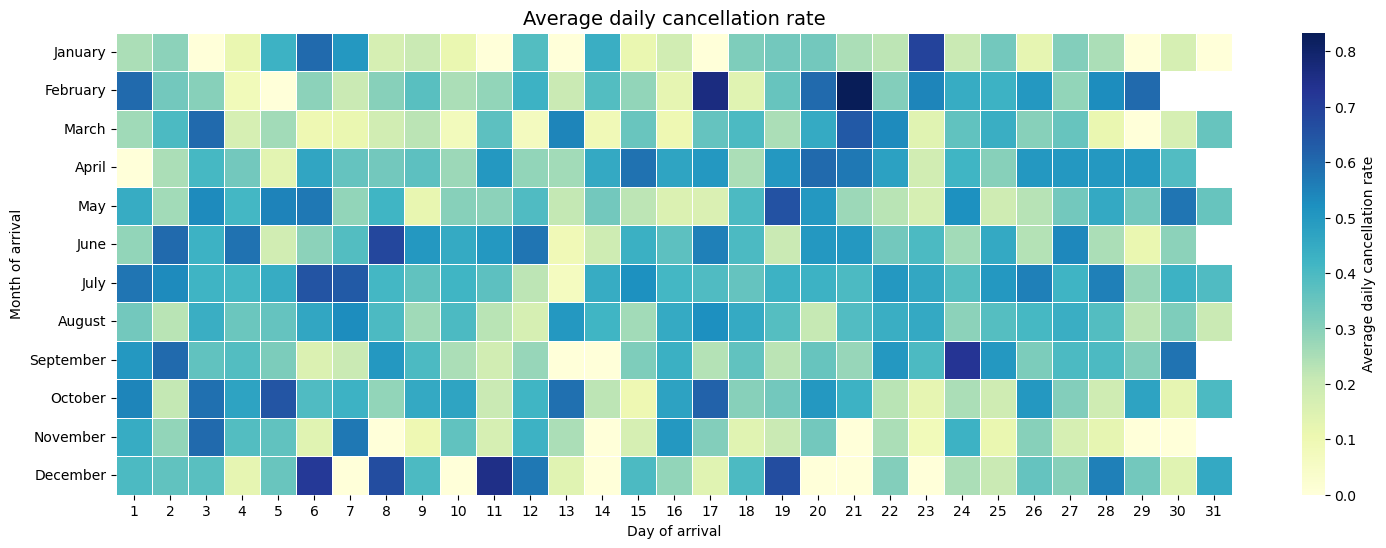

In [15]:
# Cancellation rate per day
cancellation_rate = (
    booking.groupby(['arrival_date_month', 'arrival_date_day_of_month'])['canceled']
    .mean()
    .reset_index()
)

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

cancellation_rate['arrival_date_month'] = pd.Categorical(
    cancellation_rate['arrival_date_month'],
    categories=month_order,
    ordered=True
)

heatmap_data = cancellation_rate.pivot(
    index='arrival_date_month',
    columns='arrival_date_day_of_month',
    values='canceled'
)

plt.figure(figsize=(18, 6))
sns.heatmap(
    heatmap_data,
    linewidths=0.5,
    cbar_kws={'label': 'Average daily cancellation rate'},
    cmap='YlGnBu',
)
plt.title("Average daily cancellation rate", fontsize=14)
plt.xlabel("Day of arrival")
plt.ylabel("Month of arrival")
plt.show()

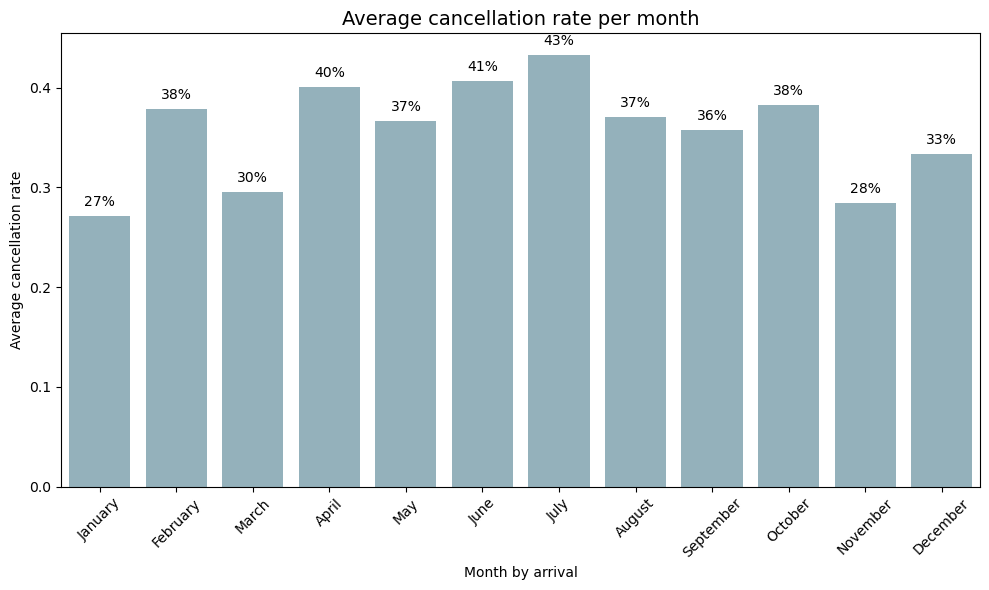

In [16]:
# Cancellation rate per month
cancellation_by_month = (
    booking.groupby('arrival_date_month')['canceled']
    .mean()
    .reset_index()
)

cancellation_by_month['arrival_date_month'] = pd.Categorical(
    cancellation_by_month['arrival_date_month'],
    categories=month_order,
    ordered=True
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=cancellation_by_month,
    x='arrival_date_month',
    y='canceled',
    color="#8EB4C1"
)

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.01,
        f"{p.get_height():.0%}",
        ha='center'
    )

plt.title("Average cancellation rate per month", fontsize=14)
plt.xlabel("Month by arrival")
plt.ylabel("Average cancellation rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



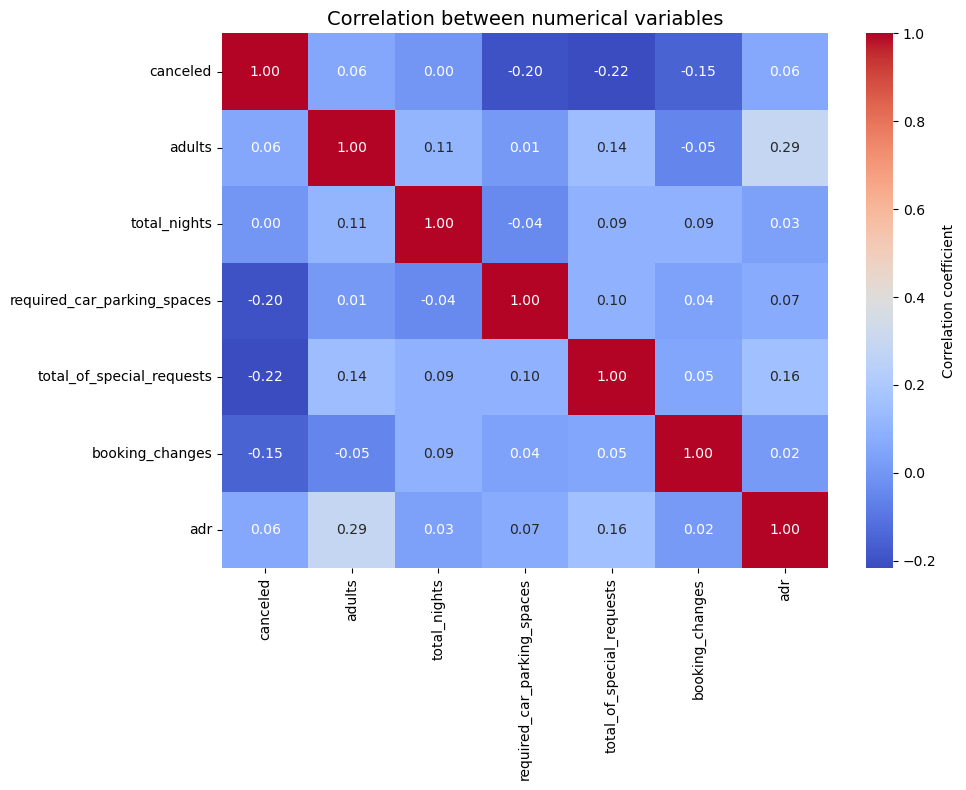

In [24]:
# Heatmap of correlation between numerical variables
plt.figure(figsize=(10, 8))
corr = booking[num_vars].corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation coefficient'}
)
plt.title("Correlation between numerical variables", fontsize=14)
plt.tight_layout()

/var/folders/ph/04p3g2s921j6d8fvnrbb7rcm0000gn/T/ipykernel_7029/185329802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancellation_by_customer, x='customer_type', y='canceled', palette='pastel', ax=axes[0])
/var/folders/ph/04p3g2s921j6d8fvnrbb7rcm0000gn/T/ipykernel_7029/185329802.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancellation_by_deposit, x='deposit_type', y='canceled', palette='pastel', ax=axes[1])
/var/folders/ph/04p3g2s921j6d8fvnrbb7rcm0000gn/T/ipykernel_7029/185329802.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

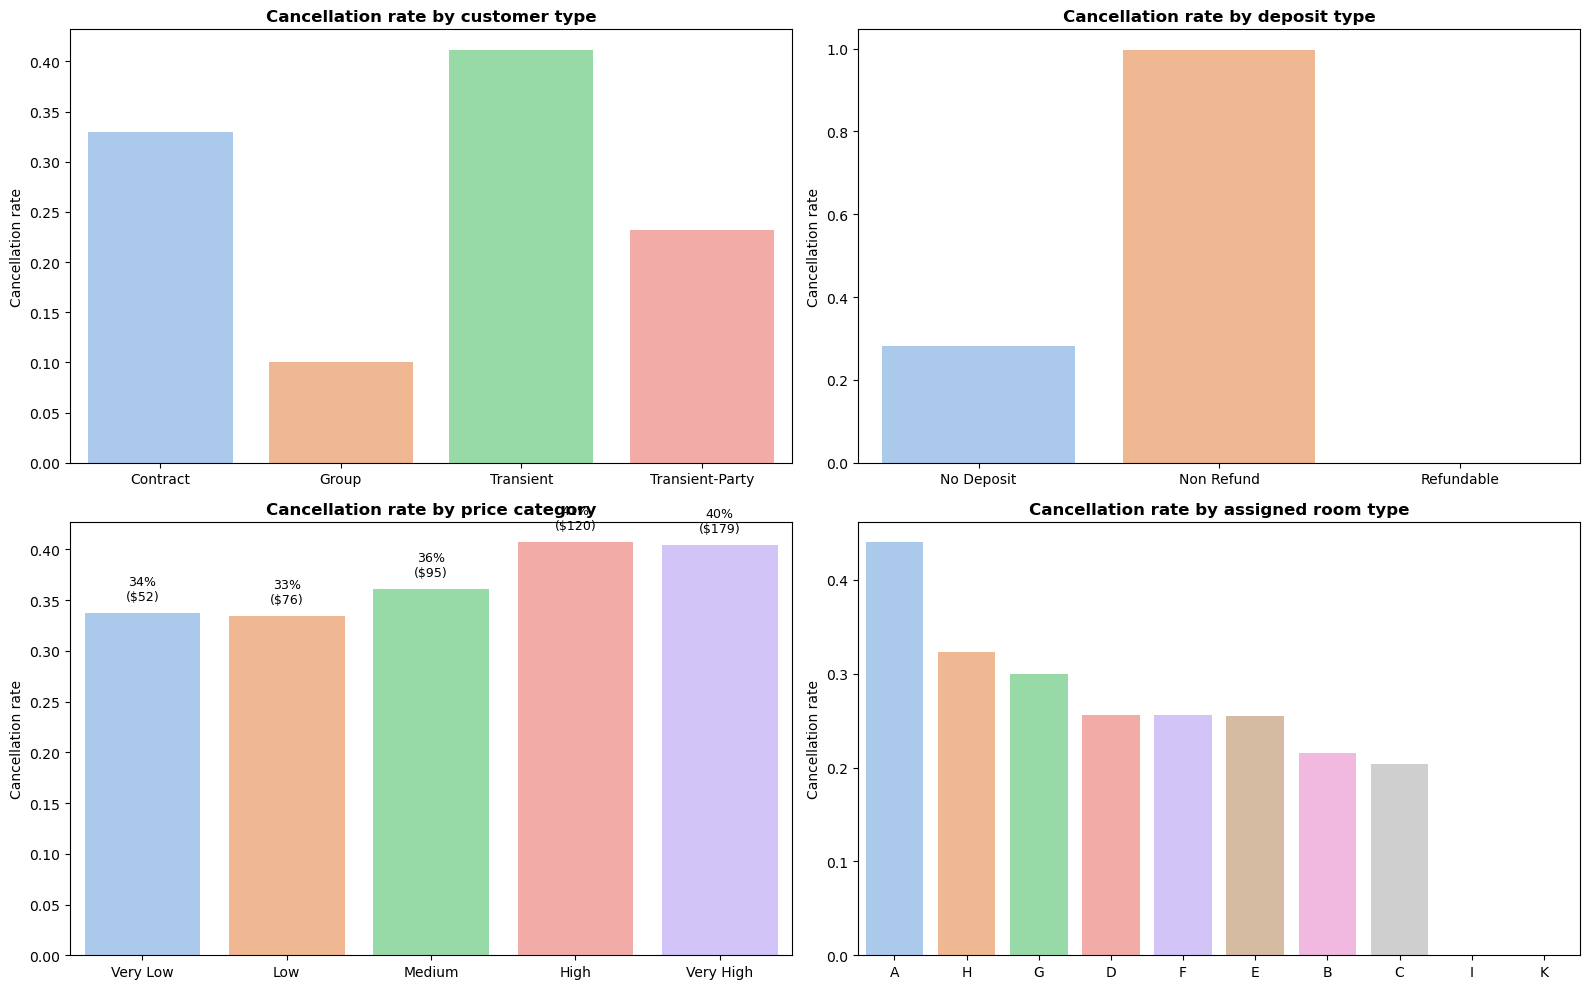

In [33]:
# Cancellation rate by categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# 1. Customer type
cancellation_by_customer = booking.groupby('customer_type')['canceled'].mean().reset_index()
sns.barplot(data=cancellation_by_customer, x='customer_type', y='canceled', palette='pastel', ax=axes[0])
axes[0].set_title("Cancellation rate by customer type", fontsize=12, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Cancellation rate")

# 2. Deposit type
cancellation_by_deposit = booking.groupby('deposit_type')['canceled'].mean().reset_index()
sns.barplot(data=cancellation_by_deposit, x='deposit_type', y='canceled', palette='pastel', ax=axes[1])
axes[1].set_title("Cancellation rate by deposit type", fontsize=12, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("Cancellation rate")

# 3. Price category
cancellation_by_price = booking.copy()
cancellation_by_price['adr_bin'] = pd.qcut(cancellation_by_price['adr'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
cancellation_rate_price = cancellation_by_price.groupby('adr_bin').agg({'canceled': 'mean', 'adr': 'mean'}).reset_index()
sns.barplot(data=cancellation_rate_price, x='adr_bin', y='canceled', palette='pastel', ax=axes[2])
for i, p in enumerate(axes[2].patches):
    cancel_rate = p.get_height()
    avg_price = cancellation_rate_price.iloc[i]['adr']
    axes[2].text(p.get_x() + p.get_width() / 2, p.get_height() + 0.01, f"{cancel_rate:.0%}\n(${avg_price:.0f})", ha='center', va='bottom', fontsize=9)
axes[2].set_title("Cancellation rate by price category", fontsize=12, fontweight='bold')
axes[2].set_xlabel("")
axes[2].set_ylabel("Cancellation rate")

# 4. Assigned room type
cancellation_by_room = booking.groupby('assigned_room_type')['canceled'].mean().reset_index().sort_values('canceled', ascending=False)
sns.barplot(data=cancellation_by_room, x='assigned_room_type', y='canceled', palette='pastel', ax=axes[3])
axes[3].set_title("Cancellation rate by assigned room type", fontsize=12, fontweight='bold')
axes[3].set_xlabel("")
axes[3].set_ylabel("Cancellation rate")

plt.tight_layout()
plt.show()

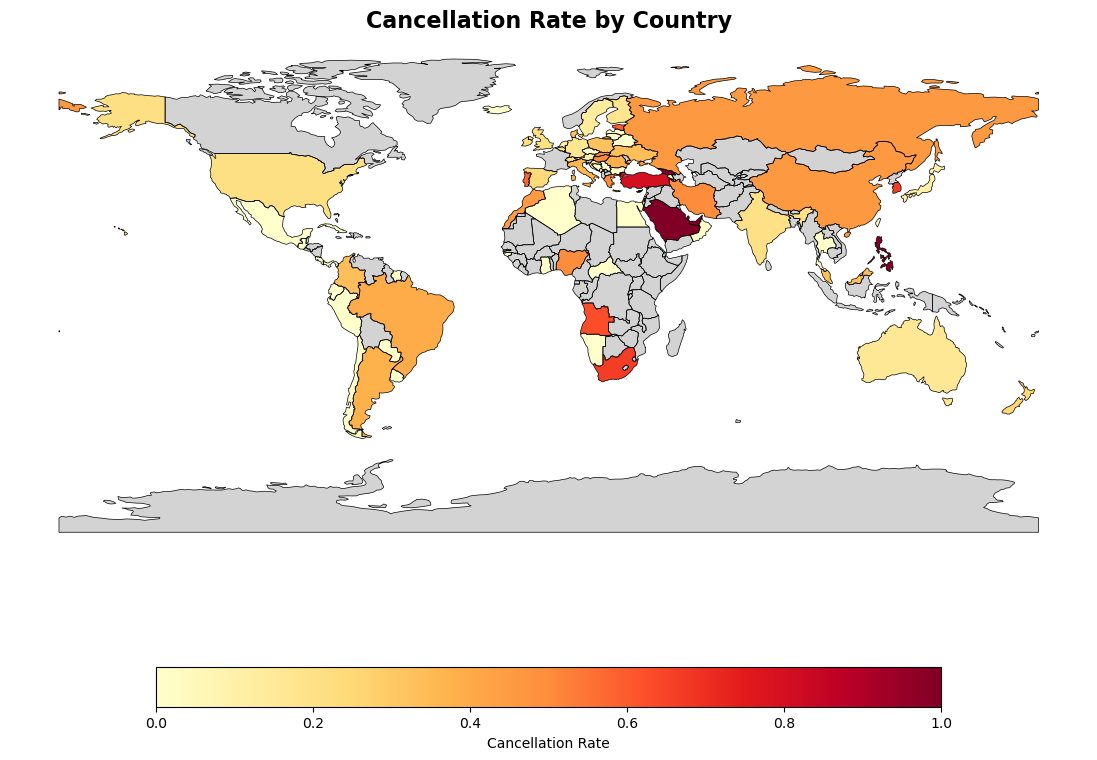

In [38]:
# Cancellation rate by country - Map visualization
import geopandas as gpd

# Get world map data from Natural Earth
world = gpd.read_file('https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip')

# Calculate cancellation rate by country
cancellation_by_country = booking.groupby('country')['canceled'].mean().reset_index()
cancellation_by_country.columns = ['iso_a3', 'cancellation_rate']

# Merge with world map (using ISO_A3 column from Natural Earth data)
world_cancel = world.merge(cancellation_by_country, left_on='ISO_A3', right_on='iso_a3', how='left')

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
world_cancel.boundary.plot(ax=ax, linewidth=0.5, color='black')
world_cancel.plot(
    column='cancellation_rate',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    missing_kwds={'color': 'lightgrey', 'label': 'No data'},
    legend_kwds={'label': 'Cancellation Rate', 'orientation': 'horizontal', 'shrink': 0.5}
)
ax.set_title('Cancellation Rate by Country', fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# ## 3. ADR related to variables

